# 데이터의 이해
- 데이터의 종류: 정형/비정형/반정형
- 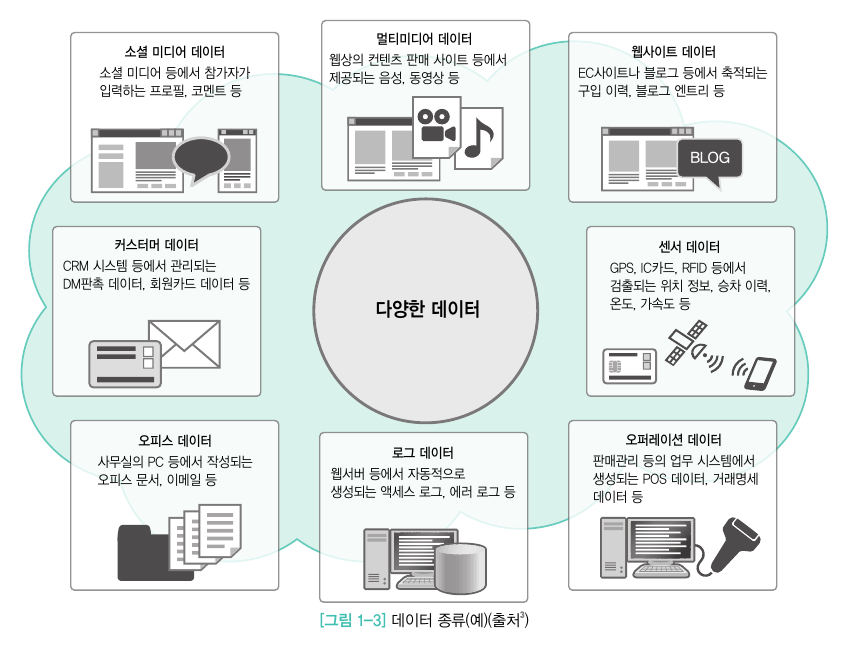

- 2021년 데이터 분석에 가장 수요가 많은 프로그램
- The Most In-Demand Skills for Data Scientists in 2021
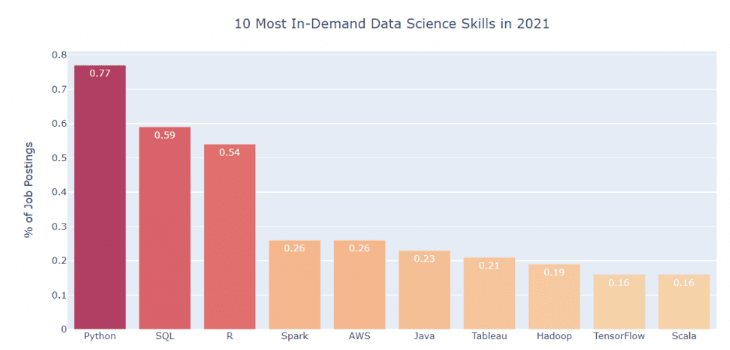

- 데이터 분석 프로젝트 단계
1. 비즈니스 이해 -> 2. 데이터 이해 -> 3. 데이터 준비 -> 4. 모델 작성 -> 평가 -> 공유/배포
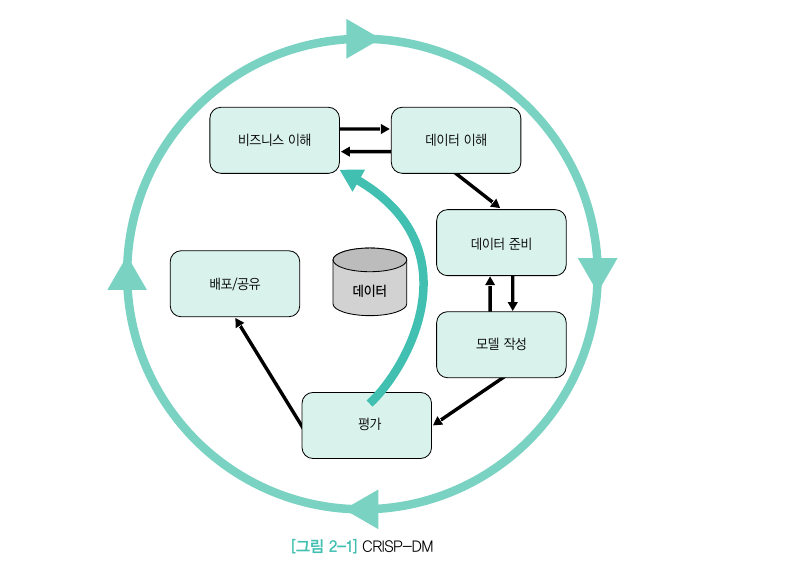

## 정형 데이터 전처리
- 목표: 데이터 분석을 통해 계약 가능성 높은 고객 찾아내기
- data: bank.csv
- 속성 항목
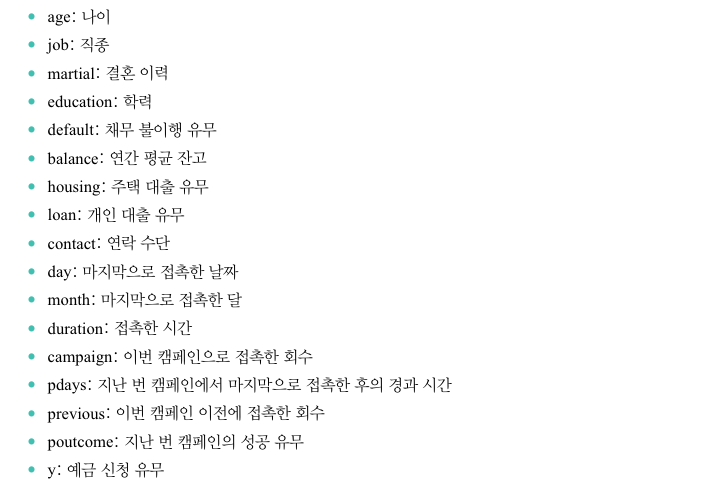

- 데이터 분석 관점
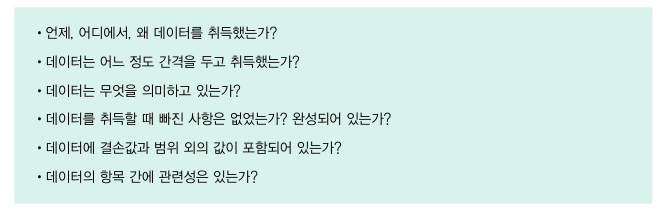

### 1. pandas 모듈을 이용해 데이터 읽기 및 확인하기

In [4]:
# Pandas의 로드
import pandas as pd


# 파일을 리드
bank_df = pd.read_csv('./bank.csv')
# 데이터가 제대로 읽히지 않을 경우
#bank_df = pd.read_csv('./bank.csv', sep='.')

# 선두에서 5행까지 표시
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [6]:
# 마지막에서 10행전까지 표시
bank_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [13]:
# 데이터의 행수, 열수를 확인
print(bank_df.shape)

(7234, 17)


In [12]:
# 데이터 형을 확인
bank_df.dtypes

#-> 문자형/숫자형 같이 나와있음!

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### 2. 결손값의 확인

In [14]:
# 결손값 => 결측지(NaN) 확인 
# 열단위로 결손값 합 확인 
print(bank_df.isna().sum())

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [15]:
### 데이터행에 결손값이 포함되어 있는가?
print(bank_df.isnull().any(axis=1)) # 행 단위 결과 확인

### 데이터열에 결손값이 포함되어 있는가?
print(bank_df.isnull().any(axis=0)) # 열 단위 결과 확인

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool


In [16]:
### 데이터행별 결손값의 갯수
print('====== 데이터 행별 결손값 ======')
print(bank_df.isnull().sum(axis=1), '\n') # 행 단위 결과 확인

### 데이터열별 결손값의 갯수
print('====== 데이터 열별 결손값 ======')
print(bank_df.isnull().sum(axis=0), '\n') # 열 단위 결과 확인

====== 데이터 행별 결손값 ======
0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64 

====== 데이터 열별 결손값 ======
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64 



In [20]:
### 데이터행별 결손값의 갯수가 많은 순서로 정렬
print(bank_df.isnull().sum(axis=1).sort_values(ascending=False)) # 내림차순

139     4
1762    4
1670    4
1814    4
1904    4
       ..
4667    0
4669    0
6038    0
6037    0
4047    0
Length: 7234, dtype: int64


### 3. 통계량의 계산

In [21]:
### 데이터형이 수치(숫자)인 각종 통계량의 계산
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


- 대표 통계량

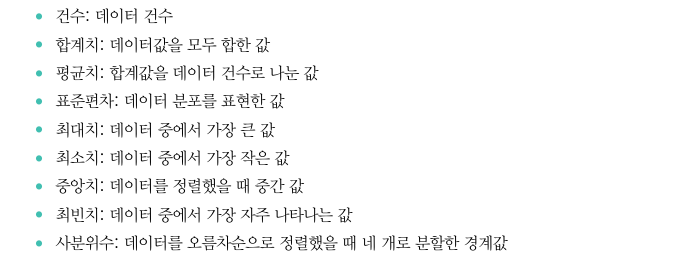

- 중앙값과 최빈치는 특이값(이상치)에 영향을 받지 않음
- (예: 가정 연소득을 계산할때 고위소득층/저위소득층을 제외)


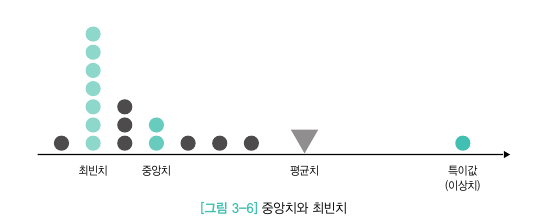

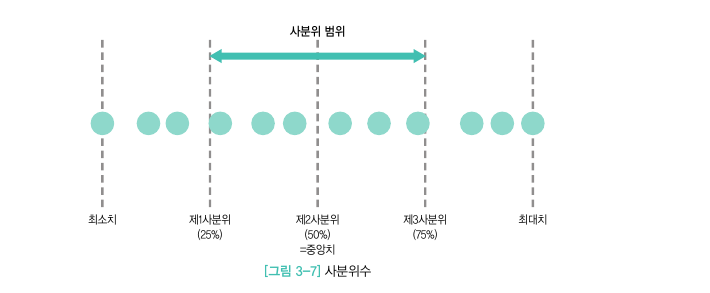

In [22]:
### 데이터형이 문자열인 각종 통계량의 계산
bank_df.describe(include = [object]) # 문자들(object)을 포함 빈도수
# .describe() -> 기본: 숫자(int)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


### 4. 데이터의 가시화１

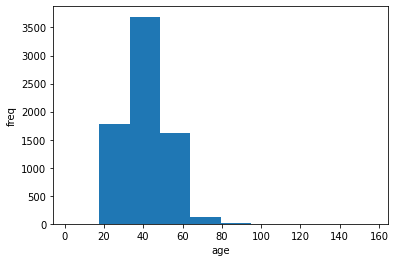

In [28]:
# 모듈 연결
import matplotlib.pyplot as plt 

# age의 히스토그램을 작성
plt.hist(bank_df['age'])

# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('age')
plt.ylabel('freq')

plt.show()

#-> 40대에 몰려있음 

- 히스토그램: 도수분포표를 시각적으로 표현한 그래프

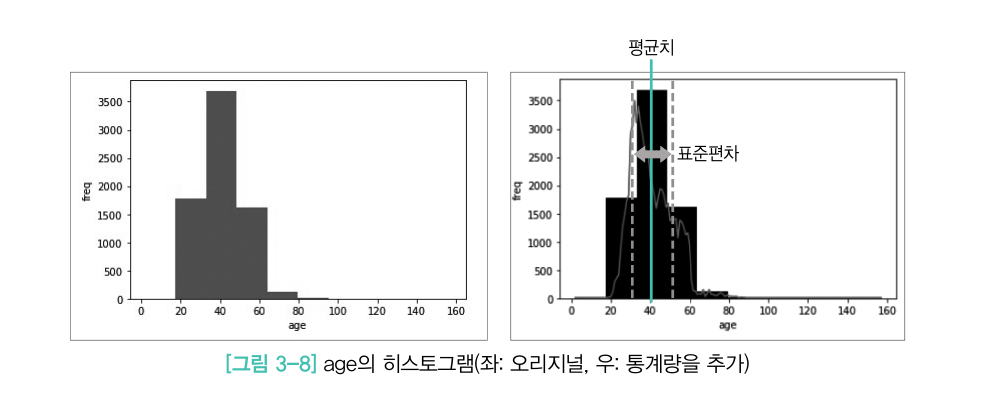

- 숫치 항목에 대한 히스토그램 작성

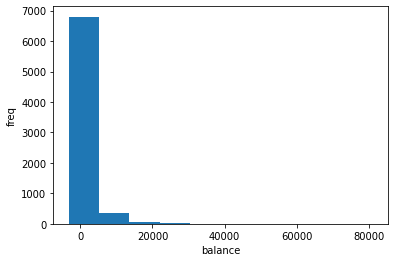

In [29]:
# balance의 히스토그램 (balance: 잔고내역)
plt.hist(bank_df['balance'])

# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('balance')
plt.ylabel('freq')

plt.show()

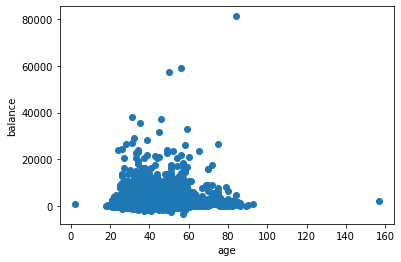

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [39]:
### age와 balance의 산포도를 작성
plt.scatter(bank_df['age'], bank_df['balance']) 
plt.xlabel('age')     # x축
plt.ylabel('balance') # y축
plt.show()

### age와 balance의 상관계수
bank_df[['age', 'balance']].corr()

#-> 나이: 20~60대 , 잔고: 20000달러 미만에 집중되어 분포 

- 상관계수: -1 ~ 1 사이의 값을 취하며 절대값이 크면 클수록 두 항목의 관련성이 강함

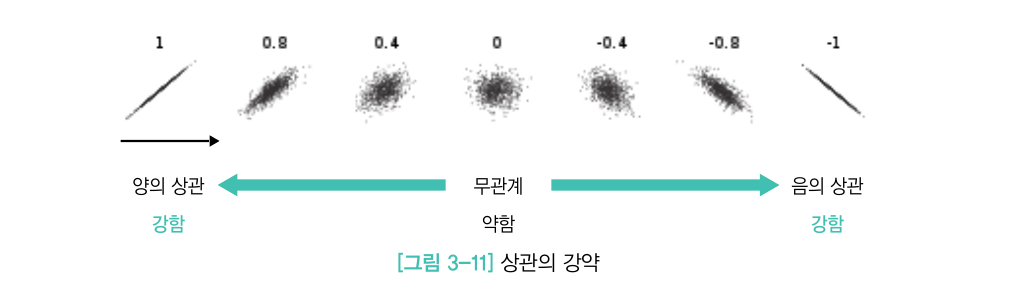

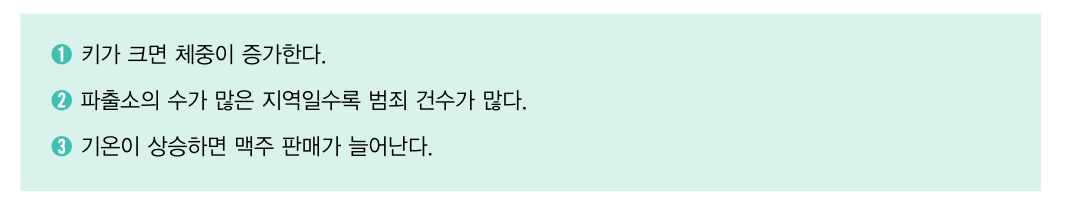

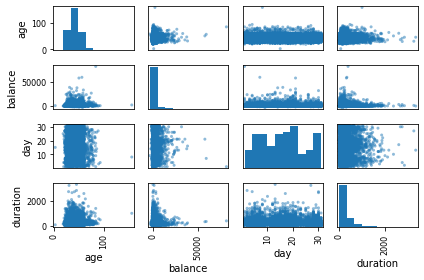

,age,balance,day,duration
age,1.000000,0.112364,-0.015818,0.006794
balance,0.112364,1.000000,0.011404,0.009340
day,-0.015818,0.011404,1.000000,-0.031867
duration,0.006794,0.009340,-0.031867,1.000000


In [45]:
### 산포도행렬의 작성
pd.plotting.scatter_matrix(bank_df[['age', 'balance', 'day', 'duration']])
plt.tight_layout() # 각 그래프 띄어서 보여줌
plt.show()

### 상관도 
bank_df[['age', 'balance', 'day', 'duration']].corr()

#-> 결과적으로는 데이터들 0에 가까워 -> 서로에게 연관 거의  X


#### 원 그래프 작성하기
- 문자형 자료에 대한 비율 계산 
- 어느 곳에 데이터가 얼마나 분포하는지 시각적으로 확인하고 에측하기 위해 필요

In [59]:
### 'job' 값의 비율을 계산

# 해당 데이터 갯수/ 전제 데이터 갯수
job_u = bank_df['job'].unique()
print(job_u)

# 방법 1
print(bank_df.groupby('job')[['age']].count() / len(bank_df)
) # DataFrame 구조
print('\n')

# 방법 2
print(bank_df['job'].value_counts(ascending=False, normalize=True)
) # Series 구조

['management' 'technician' 'blue-collar' 'retired' 'services' 'admin.'
 'entrepreneur' 'self-employed' 'unemployed' 'student' nan 'housemaid']
                    age
job                    
admin.         0.115289
blue-collar    0.207216
entrepreneur   0.033038
housemaid      0.028753
management     0.215648
retired        0.048521
self-employed  0.035388
services       0.091374
student        0.021150
technician     0.166713
unemployed     0.030827


management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


<class 'pandas.core.series.Series'>
Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student'],
      dtype='object')
[0.21696801 0.20848401 0.16773296 0.11599444 0.09193324 0.0488178
 0.03560501 0.03324061 0.0310153  0.02892907 0.02127955]


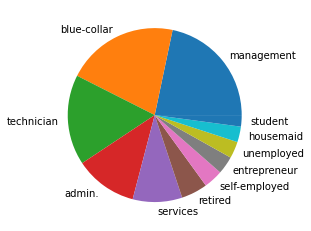

In [70]:
job_nor = bank_df['job'].value_counts(ascending=False, normalize=True)
print(type(job_nor))
#-> Series 구조 index/values 따로 확인 가능


# 'job' 값의 레이블
print(job_nor.index)

# 'job' 의 값
print(job_nor.values)

# 'job' 의 원그래프를 작성
plt.pie(job_nor.values, labels=job_nor.index)
plt.show()


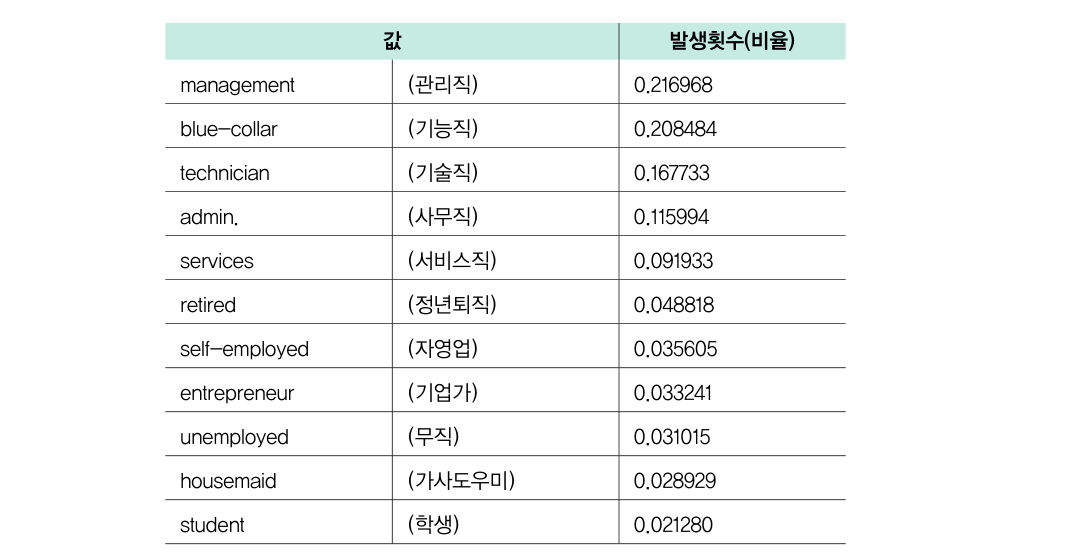

<class 'pandas.core.series.Series'>
management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64
Index(['married', 'single', 'divorced'], dtype='object')
[0.60035941 0.28476638 0.11487421]


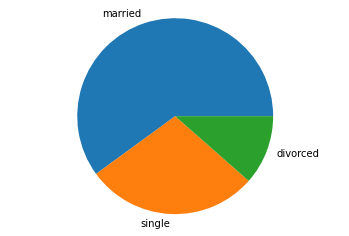

In [77]:
# 'marital'값의 비율을 계산
marital_nor = bank_df['marital'].value_counts(ascending=False, normalize=True)
print(type(job_nor))
print(job_nor)

# 'marital'값의 레이블
print(marital_nor.index)
# 'martial'의 값
print(marital_nor.values)

# 'marital'의 원 그래프를 작성
plt.pie(marital_nor.values, labels=marital_nor.index)
plt.axis('equal')
plt.show()

<class 'pandas.core.series.Series'>
Index(['no', 'yes'], dtype='object')
[0.8820846 0.1179154]


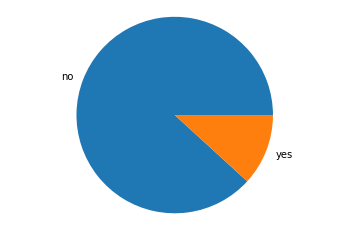

In [78]:
y_nor = bank_df['y'].value_counts(ascending=False, normalize=True)
print(type(y_nor))


# 'y'값의 레이블
print(y_nor.index)
# 'y'의 값
print(y_nor.values)
# 'y'의 원 그래프를 작성
plt.pie(y_nor.values, labels=y_nor.index)
plt.axis('equal')
plt.show()

#-> 데이터 불균형 

- no가 많은 데이터의 불균형 발생

#### 차트 한번에 그리기

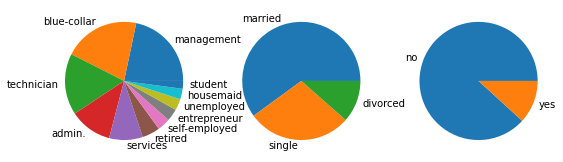

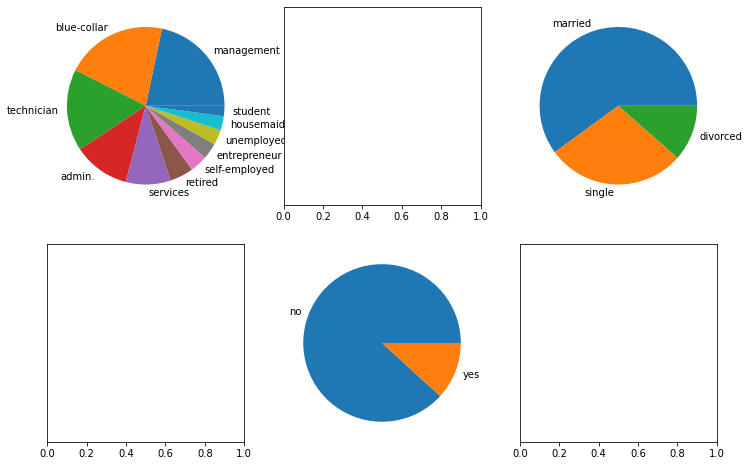

In [103]:
job_nor = bank_df['job'].value_counts(ascending=False, normalize=True)
marital_nor = bank_df['marital'].value_counts(ascending=False, normalize=True)
y_nor = bank_df['y'].value_counts(ascending=False, normalize=True)

# 차트가 들어갈 1행 3열의 칸을 만들어줌 
fig, axs = plt.subplots(1, 3, figsize=(9,3), sharey=True) 

axs[0].pie(job_nor.values, labels=job_nor.index)
axs[1].pie(marital_nor.values, labels=marital_nor.index)
axs[2].pie(y_nor.values, labels=y_nor.index)
plt.show()

print('='*70)
# 차트가 들어갈 2행 3열의 칸을 만들어줌 
fig, axs = plt.subplots(2, 3, figsize=(12,8), sharey=True) 

axs[0][0].pie(job_nor.values, labels=job_nor.index)
axs[0][2].pie(marital_nor.values, labels=marital_nor.index)
axs[1][1].pie(y_nor.values, labels=y_nor.index)
plt.show()

# 전체 레이아웃
# 경계선 여유있게 줄 수 있음 
fig.tight_layout() 

plt.show()

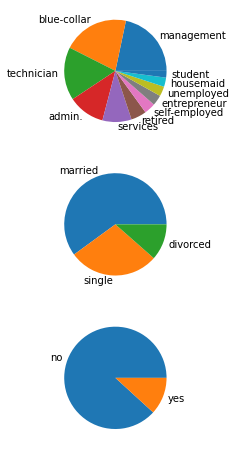

In [117]:
# plt.subplot()
plt.figure(figsize=(8,8))

# 3행 1열 1번째
plt.subplot(3, 1, 1)
plt.pie(job_nor.values, labels=job_nor.index)

# 3행 2열 4번째
plt.subplot(3, 1, 2)
plt.pie(marital_nor.values, labels=marital_nor.index)

# 3행 1열 3번째
plt.subplot(3, 1, 3)
plt.pie(y_nor.values, labels=y_nor.index)

plt.show()
#-> 결과 아래로 나옴 

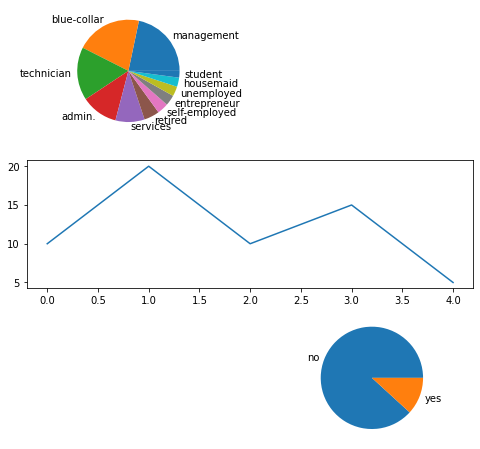

In [127]:
# plt.subplot()
plt.figure(figsize=(8,8))

# 3행 1열 1번째
plt.subplot(3, 2, 1)
plt.pie(job_nor.values, labels=job_nor.index)

# 3행 2열 4번째
plt.subplot(3, 1, 2)
x=[10,20,10,15,5] # 두칸을 다 잡음()
plt.plot(x)

# 3행 1열 3번째
plt.subplot(3, 2, 6)
plt.pie(y_nor.values, labels=y_nor.index)

plt.show()
#-> 결과 아래로 나옴 

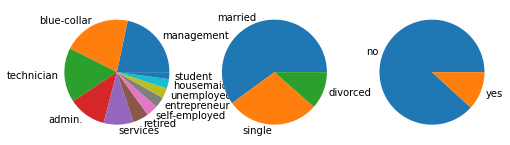

In [120]:
# plt.subplot()
plt.figure(figsize=(8,8))

# 3행 1열 1번째
plt.subplot(1, 3, 1)
plt.pie(job_nor.values, labels=job_nor.index)

# 3행 2열 4번째
plt.subplot(1, 3, 2)
plt.pie(marital_nor.values, labels=marital_nor.index)

# 3행 1열 3번째
plt.subplot(1, 3, 3)
plt.pie(y_nor.values, labels=y_nor.index)

plt.show()

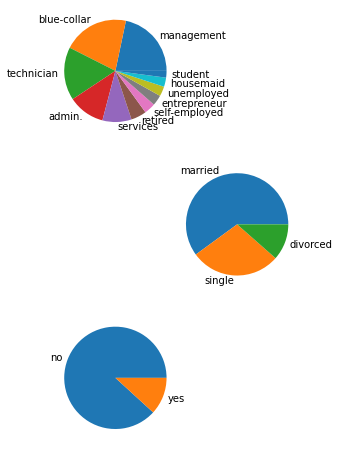

In [119]:
# plt.subplot()
plt.figure(figsize=(8,8))

# 3행 1열 1번째
plt.subplot(3, 1, 1)
plt.pie(job_nor.values, labels=job_nor.index)

# 3행 2열 4번째
plt.subplot(3, 2, 4)
plt.pie(marital_nor.values, labels=marital_nor.index)

# 3행 1열 3번째
plt.subplot(3, 1, 3)
plt.pie(y_nor.values, labels=y_nor.index)

plt.show()
 

In [94]:
from random import *
import time

In [102]:
for i in range(10):
    time.sleep(3)
    print(i+1)
print('결과:', randint(1, 15))

1
2
3
4
5
6
7
8
9
10
결과: 8


### 5. 데이터의 시각화 2

[9       56
10      41
18      54
34      42
67      55
        ..
7218    63
7225    29
7228    38
7230    28
7233    25
Name: age, Length: 853, dtype: int64, 0       58
1       36
2       25
3       53
4       24
        ..
7226    33
7227    36
7229    25
7231    59
7232    37
Name: age, Length: 6381, dtype: int64]


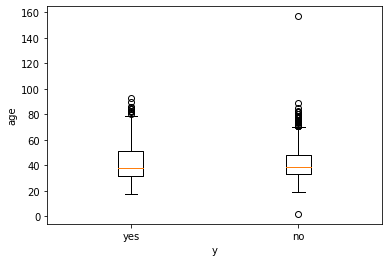

In [149]:
# 'y'가 yes나 no일때의 'age'데이터를 추출
y_yes = bank_df[bank_df['y'] == 'yes'] 
y_no  = bank_df[bank_df['y'] == 'no'] 

# 'y'가 yes나 no일때의 'age'데이터를 추출
y_yes2 = bank_df.loc[bank_df['y'] == 'yes', 'age'] # 'age' 값만 뽑아오기
y_no2 = bank_df.loc[bank_df['y'] == 'no', 'age'] # 'age' 값만 뽑아오기

# yes와 no의 데이터를 정리
y_age = [y_yes['age'], y_no['age']] 
print(y_age)

# 박스수염 플롯의 작성
plt.boxplot(y_age)

# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('y')
# y축 （종축）의 레이블을 추가
plt.ylabel('age')

ax = plt.gca() # 객체들을 쪼개서 만들어줌 , 각각의 위치값 
plt.setp(ax, xticklabels=['yes', 'no'])

plt.show()

#-> 박스플롯 벗어나 위에있는 동그란 녀석들 -> 이상치!!
#-> 이렇게 한개 한개 가져오면 해당 열의 데이터에 대해서만 출력 가능  

In [146]:
# 데이터 타입 확인 

# y_age 리스트구조 -> 리스트 안 두개의 리스트(y_yes, y_no) 존재
print(y_age[0][:5])
# 두개의 리스트(y_yes, y_no) -> Series 구조
print('yes:', type(y_age[0])) 
print('no:', type(y_age[1]))

print('y_age:', type(y_age)) # 리스트 구조 

9     56
10    41
18    54
34    42
67    55
Name: age, dtype: int64
yes: <class 'pandas.core.series.Series'>
no: <class 'pandas.core.series.Series'>
y_age: <class 'list'>


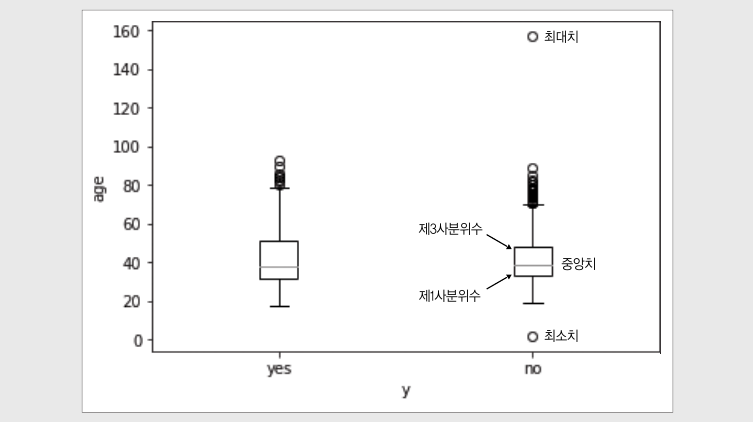

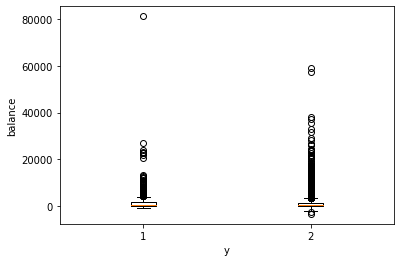

In [155]:
##'y'가 yes나 no일때의 'balance'데이터를 추출

# 위에서 만든 'y_yes', 'y_no'이용해 박스플롯의 작성 -> 위에서 정의해줘서 필요 X
#y_yes = bank_df[bank_df['y'] == 'yes'] 
#y_no  = bank_df[bank_df['y'] == 'no'] 

# yes와 no의 데이터를 정리
y_bal = [y_yes['balance'], y_no['balance']] 
#print(y_age)

# 박스수염 플롯의 작성
plt.boxplot(y_bal)

# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('y')
# y축 （종축）의 레이블을 추가
plt.ylabel('balance')

#ax = plt.gca() # 위에서 정의해줘서 필요 X
plt.setp(ax, xticklabels=['yes', 'no'])

#plt.xticks(['yes', 'no']) # 이렇게도 가능 / but 위에서 정의해서 여기선 안됨
plt.show()


### 6. 결손값 처리
- 결손값 제거
- 수치형 데이터 => 평균/중앙값으로 대체 
- 범주형 데이터 => mode 값으로 대체
- 간단한 예측모델을 만들어 대체

In [163]:
## 결손값 수 확인
bank_df.isna().sum()
bank_df.isnull().sum()

# 파이썬에서는 NaN = Null 

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

In [164]:
# 데이터 행/열 갯수 확인 (배열 구조)
bank_df.shape

(7234, 17)

In [165]:
# 'bank_df'의 모든 NaN값 삭제 
bank_df_tmp = bank_df.dropna() 
bank_df_tmp.shape

(1273, 17)

In [166]:
# NaN이 1개라도 있는 행 삭제
bank_df_tmp = bank_df.dropna(how='any')
print(f'how=any:{bank_df_tmp.shape}')

# 모든 데이터가 NaN이어야 해당 행 삭제
bank_df_tmp = bank_df.dropna(how='all') 
print(f'how=all:{bank_df_tmp.shape}')

# 'job'、'education'에서 결손값이 포함되어 있는 행을 삭제
bank_df = bank_df.dropna(subset=['job', 'education']) 
print(f'subset 사용:{bank_df.shape}')

how=any:(1273, 17)
how=all:(7234, 17)
subset 사용:(6935, 17)


In [173]:
# 데이터의 건수, 항목수를 확인
bank_df.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact      1925
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
y               0
dtype: int64

In [175]:
# 결손값이 2400개 이상인 '열'을 제외
bank_df = bank_df.dropna(thresh=2400, axis=1)
print(f'thresh 사용:{bank_df.shape}')
print(bank_df.shape)

# 데이터의 건수, 항목수를 확인
bank_df.isna().sum()

thresh 사용:(6935, 16)
(6935, 16)


age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact      1925
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
y               0
dtype: int64

#### 결손값 보완(대체)

In [181]:
display(bank_df.head(3))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,no


In [189]:
# 결손값을 「unknown」으로 치환
# 'bank_df'의 모든 NaN값 -> 'unknown'으로 변환 
bank_df_tmp = bank_df.fillna('unknown') 

# 특정 변수(열)를 기준으로 NaN값 변경
bank_df = bank_df.fillna({'contact':'unknown'}) # 딕셔너리 구조로

# 선두에서 5행까지 표시
display(bank_df_tmp.head())
display(bank_df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no


#### 특이값(이상치)의 제외
- 표준점수로 변환 후 -3 이하 및 +3 이상인 값 제거
- `IQR(4분위값)` 방식으로 처리
    - IQR(Interquartile range): Q3 - Q1를 의미한다.
    - Q3 - Q1: 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이

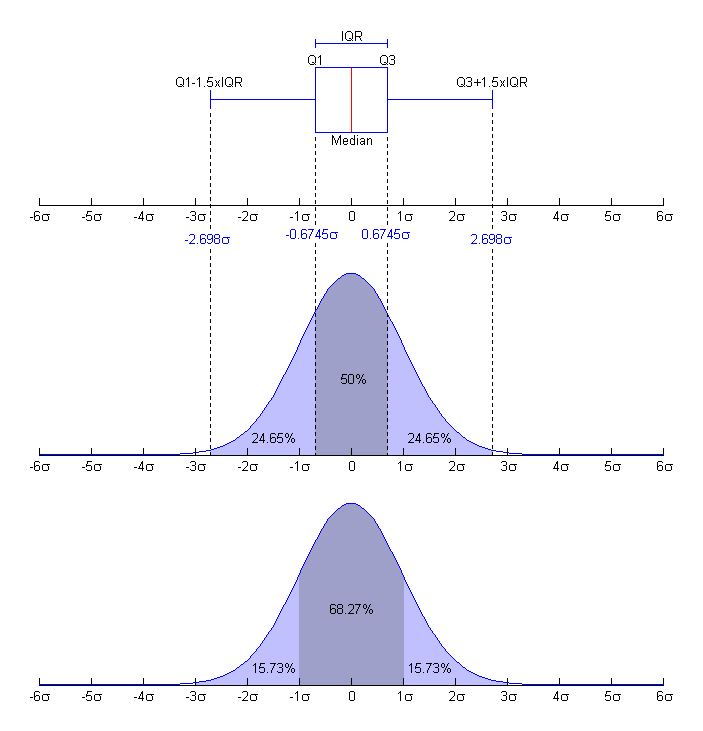

- [참고1_블로그](https://techntalk.tistory.com/87)

#### 표준점수 이용 방법 
- 평균=0, 표준편차=1 인 분포로 변환 후 +3 이상 / -3 이하 제거

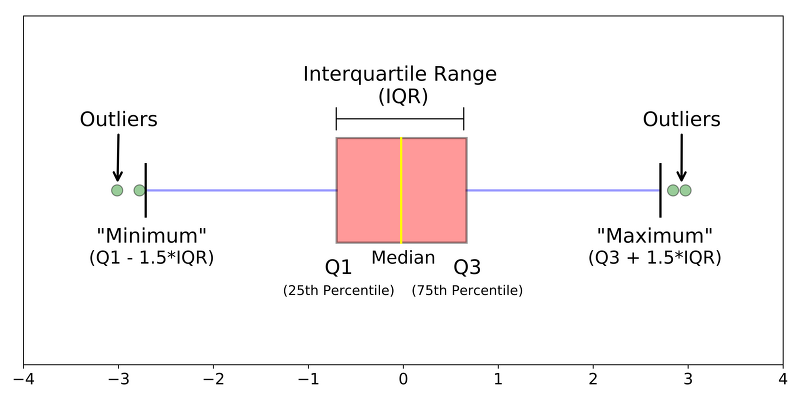

In [190]:
### 'age'가 18세이상 100세미만이 아닌행을 삭제
#bank_df = bank_df[bank_df['age']>=18]
#bank_df = bank_df[bank_df['age']<=100]
bank_df = bank_df[(bank_df['age']>=18) & (bank_df['age']<=100)]

# 데이터 건수, 항목수를 확인
print(bank_df.shape)

(6933, 16)


In [198]:
print(bank_df['age'].describe())

Q1 = bank_df['age'].describe()['25%'] # Q1: 25%(1/4)에 해당하는 값
Q3 = bank_df['age'].describe()['75%'] # Q3: 75%(3/4)에 해당하는 값
Q2 = bank_df['age'].describe()['50%'] # Q3: 중앙값, 50%(3/4)에 해당하는 값

IQR = Q3 - Q1 # 4분위 범위값

print('='*50)
print(f'Q1:{Q1}, Q2(중앙값):{Q2}, Q3:{Q3}, IQR:{IQR}')

count    6933.000000
mean       40.664647
std        10.520371
min        19.000000
25%        32.000000
50%        38.000000
75%        48.000000
max        90.000000
Name: age, dtype: float64
Q1:32.0, Q2(중앙값):38.0, Q3:48.0, IQR:16.0


In [199]:
maxNum = Q3 + 1.5*IQR
minNum = Q1 - 1.5*IQR

print(f'Maxnum:{maxNum}, Minnum:{minNum}')

Maxnum:72.0, Minnum:8.0


In [201]:
bank_df_tmp = bank_df[(bank_df['age']>=minNum) & (bank_df['age']<=maxNum)]
print(bank_df_tmp.shape)

(6877, 16)


#### 문자열을 수치로 변환
- 데이터 정규화/표준화 
- 데이터 자체를 숫자로 만들어보자!

In [202]:
display(bank_df.head(3))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no


##### 특정 필드의 데이터 원하는 값으로 변환 

In [214]:
# 'y'필드의  yes를 1、no를 0으로 치환
bank_df_tmp['y'] = bank_df_tmp['y'].replace('yes', 1)
bank_df_tmp['y'] = bank_df_tmp['y'].replace('no', 0)

# 선두에서 5행까지 표시
display(bank_df_tmp .head(3))

/var/folders/3x/ck_8z3cd6r510s7t3t_g1nzm0000gn/T/ipykernel_73043/1764801068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_tmp['y'] = bank_df_tmp['y'].replace('yes', 1)
/var/folders/3x/ck_8z3cd6r510s7t3t_g1nzm0000gn/T/ipykernel_73043/1764801068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_tmp['y'] = bank_df_tmp['y'].replace('no', 0)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,0
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,0


#### 다수의 문자(항목)를 숫자로 변환

- 참조: https://mizykk.tistory.com/13

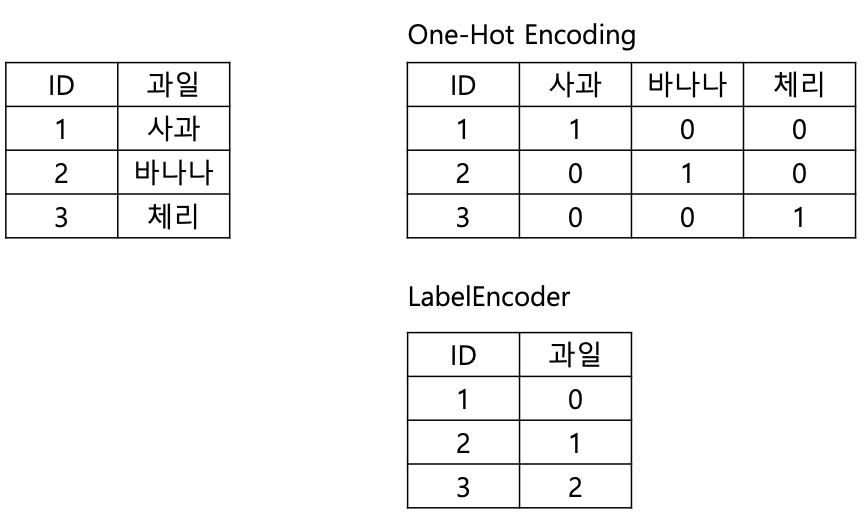

In [216]:
# job을 더미 변수로 변경 pd.get_dummies()
bank_df_job = pd.get_dummies(bank_df_tmp['job'])

# 선두에서 5행까지 표시
bank_df_job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0


- job 이외의 데이터형이 문자열인 항목에 대하여 더미 변수화 하기

In [217]:
bank_df_tmp.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
y             int64
dtype: object

In [219]:
# marital을 더미 변수로 변경
bank_df_job = pd.get_dummies(bank_df_tmp['job'])
bank_df_marital = pd.get_dummies(bank_df_tmp['marital'])
bank_df_education = pd.get_dummies(bank_df_tmp['education'])
bank_df_contact = pd.get_dummies(bank_df_tmp['contact'])
bank_df_month  = pd.get_dummies(bank_df_tmp['month'])

# 선두에서 5행까지 표시
bank_df_month.head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [228]:
# 원래의 데이터 세트에서 수치항목을 추출
dt_df = bank_df_tmp.dtypes
print(type(dt_df)) # Series 구조
print(dt_df)
# 선두에서 5행까지 표시

# 숫자인 데이터(int64)만 추출
col_lst = []
for ind, val in zip(dt_df.index, dt_df.values):
    if val == 'int64':
        col_lst.append(ind)
        
print(col_lst) 

tmp_df = bank_df_tmp[col_lst]
display(tmp_df.head())

<class 'pandas.core.series.Series'>
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
y             int64
dtype: object
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,0
1,36,265,5,348,1,-1,0,0
2,25,-7,5,365,1,-1,0,0
3,53,-3,5,1666,1,-1,0,0
4,24,-103,5,145,1,-1,0,0


In [232]:
# 수평(열)결합 
# pd.concat()
tmp_df_1 = pd.concat([bank_df_job, bank_df_marital, bank_df_education,
                     bank_df_contact, bank_df_contact], axis=1)

# 선두에서 5행까지 표시
display(tmp_df_1.head())

print(tmp_df_1.shape) # 변경
print(tmp_df.shape)   # 기존


,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,single,primary,secondary,tertiary,cellular,telephone,unknown,cellular,telephone,unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1


(6877, 23)
(6877, 8)


In [244]:
tmp_df_skl = bank_df_tmp.copy()

In [245]:
tmp_df_skl.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,0
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,0
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,0
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,0


In [237]:
#!pip install sklearn

In [249]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(tmp_df_skl['job'])
tmp_df_skl['job'] = le.transform(tmp_df_skl['job'])
tmp_df_skl.head()

#-> 문자데이터가 고유 라벨값(숫자형)을 가짐! ㅈ

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,36,9,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,0
2,25,1,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,0
3,53,9,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,0
4,24,9,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,0


In [250]:
bank_df_tmp['job'].unique()

array(['management', 'technician', 'blue-collar', 'retired', 'services',
       'admin.', 'entrepreneur', 'self-employed', 'unemployed', 'student',
       'housemaid'], dtype=object)

In [33]:
# 전처리한 결과를 CSV파일로 출력
